# Setup

In [1]:
%cd /root/jupyter
%ls -la

/__modal/volumes/vo-lCqEFw0F4sNWXGSzYRyXrS
total 1
drwxr-xr-x 1 root root  0 Jan  1  1970 ./
drwxr-xr-x 3 root root 47 Aug 30 14:45 ../


/usr/local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
!git clone https://github.com/jjordanoc/Pi3.git
%cd Pi3
%uv pip install -r requirements.txt

Cloning into 'Pi3'...
remote: Enumerating objects: 157, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 157 (delta 35), reused 138 (delta 19), pack-reused 0 (from 0)
Receiving objects: 100% (157/157), 36.80 MiB | 25.58 MiB/s, done.
Resolving deltas: 100% (35/35), done.
/__modal/volumes/vo-lCqEFw0F4sNWXGSzYRyXrS/Pi3
Using Python 3.10.15 environment at: /usr/local
Resolved 38 packages in 381ms                                        
Prepared 28 packages in 38.05s                                           
Installed 28 packages in 727ms                              
 + filelock==3.19.1
 + fsspec==2025.7.0
 + hf-xet==1.1.9
 + huggingface-hub==0.34.4
 + mpmath==1.3.0
 + networkx==3.4.2
 + numpy==1.26.4
 + nvidia-cublas-cu12==12.4.5.8
 + nvidia-cuda-cupti-cu12==12.4.127
 + nvidia-cuda-nvrtc-cu12==12.4.127
 + nvidia-cuda-runtime-cu12==12.4.127
 + nvidia-cudnn-cu12==9.1.0.70
 + nvidia-cufft-cu12==11.2.1.3
 + nvidia-curand-c

In [3]:
%uv pip install datasets lpips jaxtyping scipy matplotlib hf_transfer

Using Python 3.10.15 environment at: /usr/local
Resolved 64 packages in 261ms                                        
Prepared 20 packages in 2.11s                                            
Uninstalled 1 package in 1ms
Installed 20 packages in 345ms                              
 + contourpy==1.3.2
 + cycler==0.12.1
 + datasets==4.0.0
 + dill==0.3.8
 + fonttools==4.59.2
 - fsspec==2025.7.0
 + fsspec==2025.3.0
 + hf-transfer==0.1.9
 + jaxtyping==0.3.2
 + kiwisolver==1.4.9
 + lpips==0.1.4
 + matplotlib==3.10.6
 + multiprocess==0.70.16
 + pandas==2.3.2
 + pyarrow==21.0.0
 + pyparsing==3.2.3
 + pytz==2025.2
 + scipy==1.15.3
 + tzdata==2025.2
 + wadler-lindig==0.1.7
 + xxhash==3.5.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os

# Define the directory inside your mounted Volume
save_dir = "hf_cache"
os.makedirs(save_dir, exist_ok=True) # Create the directory if it doesn't exist

In [5]:
from huggingface_hub import snapshot_download
snapshot_download("yyfz233/Pi3", cache_dir=save_dir)

.gitattributes: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

main.png:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.83G [00:00<?, ?B/s]

'hf_cache/models--yyfz233--Pi3/snapshots/ae722e7039287d0c8fde9f11f197f804f44b510c'

In [6]:
# Seed everything for reproducibility
# code from https://gist.github.com/ihoromi4/b681a9088f348942b01711f251e5f964#file-seed_everything-py
import os
import random

import numpy as np
import torch
def seed_everything(seed: int):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
seed_everything(0)

In [7]:
from datasets import load_dataset

# download huggingface dataset 
benchmark_dataset = load_dataset("tzler/MOCHI", cache_dir=save_dir)['train']

# add ids to dataset
benchmark_dataset = benchmark_dataset.add_column("trial_id", range(len(benchmark_dataset)))

# remove majaj datset for now
benchmark_dataset = benchmark_dataset.filter(lambda x: x['dataset'] != 'majaj')
benchmark_dataset

README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/383M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2019 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2019 [00:00<?, ? examples/s]

Dataset({
    features: ['dataset', 'condition', 'trial', 'n_objects', 'oddity_index', 'images', 'n_subjects', 'human_avg', 'human_sem', 'human_std', 'RT_avg', 'RT_sem', 'RT_std', 'DINOv2G_avg', 'DINOv2G_std', 'DINOv2G_sem', 'trial_id'],
    num_rows: 1555
})

In [8]:
import random

# Create subset
qualitative_benchmark_subset = benchmark_dataset.select(random.sample(range(len(benchmark_dataset)), 25))
qualitative_benchmark_subset

Dataset({
    features: ['dataset', 'condition', 'trial', 'n_objects', 'oddity_index', 'images', 'n_subjects', 'human_avg', 'human_sem', 'human_std', 'RT_avg', 'RT_sem', 'RT_std', 'DINOv2G_avg', 'DINOv2G_std', 'DINOv2G_sem', 'trial_id'],
    num_rows: 25
})

In [9]:
import matplotlib.pyplot as plt
def plot_trial(i_trial):
    plt.figure(figsize=[15,4])
    for i_plot in range(len(i_trial['images'])):
      plt.subplot(1,len(i_trial['images']),i_plot+1)
      plt.imshow(i_trial['images'][i_plot])
      if i_plot == i_trial['oddity_index']: plt.title('odd-one-out')
      plt.axis('off')
    plt.show()

def plot_tensor(tensor):
    cpu_t = tensor.cpu()
    plt.figure(figsize=[15,4])
    for i in range(cpu_t.shape[0]):
        plt.subplot(1, cpu_t.shape[0], i+1)
        # Convert from (C,H,W) to (H,W,C) and handle channel dimension
        img = cpu_t[i].permute(1, 2, 0) if cpu_t.shape[1] == 3 else cpu_t[i, 0]
        plt.imshow(img)
        plt.axis('off')
    plt.show()

In [10]:
from typing import List
from PIL import Image
import torch
from torchvision import transforms
import math
from typing import List

sizes = set()

def pil_list_to_tensor(sources: List[Image.Image]) -> torch.Tensor:
    """Extracted from PI3 source"""
    PIXEL_LIMIT=255000
    if not sources:
        print("No images found or loaded.")
        return torch.empty(0)

    # print(f"Found {len(sources)} images/frames. Processing...")

    # --- 2. Determine a uniform target size for all images based on the first image ---
    # This is necessary to ensure all tensors have the same dimensions for stacking.
    first_img = sources[0]
    W_orig, H_orig = first_img.size
    scale = math.sqrt(PIXEL_LIMIT / (W_orig * H_orig)) if W_orig * H_orig > 0 else 1
    W_target, H_target = W_orig * scale, H_orig * scale
    k, m = round(W_target / 14), round(H_target / 14)
    while (k * 14) * (m * 14) > PIXEL_LIMIT:
        if k / m > W_target / H_target: k -= 1
        else: m -= 1
    TARGET_W, TARGET_H = max(1, k) * 14, max(1, m) * 14
    sizes.add((W_orig, H_orig, TARGET_W, TARGET_H))
    # --- 3. Resize images and convert them to tensors in the [0, 1] range ---
    tensor_list = []
    # Define a transform to convert a PIL Image to a CxHxW tensor and normalize to [0,1]
    to_tensor_transform = transforms.ToTensor()
    
    for img_pil in sources:
        try:
            # Resize to the uniform target size
            resized_img = img_pil.resize((TARGET_W, TARGET_H), Image.Resampling.LANCZOS)
            # Convert to tensor
            img_tensor = to_tensor_transform(resized_img)
            tensor_list.append(img_tensor)
        except Exception as e:
            print(f"Error processing an image: {e}")

    if not tensor_list:
        print("No images were successfully processed.")
        return torch.empty(0)

    # --- 4. Stack the list of tensors into a single [N, C, H, W] batch tensor ---
    return torch.stack(tensor_list, dim=0)

def mochi_to_batch_list(subset, device='cuda') -> List[torch.Tensor]:
    batch_list = []
    for i_trial in subset:
        batch_list.append(pil_list_to_tensor(i_trial['images']).to(device))
    return batch_list

In [11]:
import torch
from pi3.models.pi3 import Pi3

# --- Setup ---
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Pi3.from_pretrained("yyfz233/Pi3").to(device).eval()

Warning, cannot find cuda-compiled version of RoPE2D, using a slow pytorch version instead


config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.83G [00:00<?, ?B/s]

In [21]:
from typing import List, Dict
from torch.utils.data import IterableDataset, DataLoader
class Benchmark:
    def __init__(self, dataset, tensors):
        self.dataset = dataset
        self.tensors = tensors
        assert len(dataset) == len(tensors), "Dataset and tensors must have same length"
        self.results: List[Dict] = [{} for _ in range(len(dataset))]
    
    
    def __getitem__(self, idx):
        """Sole responsibility is to return metadata associated to results"""
        return {
            'metadata': self.dataset[idx],
            'img_tensor': self.tensors[idx],
            'results': self.results[idx] if len(self.results) > idx else None,
        }
    def __len__(self):
        return len(self.dataset)
    
    def as_leave_one_out_iterable(self):
        return self._LeaveOneOutIterable(self)

    class _LeaveOneOutIterable(IterableDataset):
        def __init__(self, benchmark):
            self.benchmark = benchmark
        def __iter__(self):
            for trial_idx in range(len(self.benchmark)):
                # Each trial may have different number of combinations (3 or 4 images)
                for batch_data in self.benchmark._iter_left_one_out_batches(trial_idx):
                    # Add trial tracking for result storage
                    batch_data["trial_idx"] = trial_idx
                    yield batch_data


    def _iter_left_one_out_batches(self, trial_idx):
        """Iterator that yields the complete batch of all leave-one-out combinations for a trial."""
        trial = self[trial_idx]
        t = trial['img_tensor']  # (K, C, H, W)
        K = t.shape[0]
        
        # Create the full batch tensors (same as your "before" approach)
        batch_tensor = torch.zeros(K, K-1, t.shape[1], t.shape[2], t.shape[3]).to(t.device)
        left_out_tensor = torch.zeros(K, 1, t.shape[1], t.shape[2], t.shape[3]).to(t.device)
        
        for leave_out in range(K):
            combo = [j for j in range(K) if j != leave_out]
            batch_tensor[leave_out] = t[combo]
            left_out_tensor[leave_out] = t[leave_out].unsqueeze(0)
        
        # Yield the complete batch in one step
        yield {
            "batch_tensor": batch_tensor,           # (K, K-1, C, H, W)
            "left_out_tensor": left_out_tensor,     # (K, 1, C, H, W) 
            "left_out_idx_order": list(range(K))
        }

In [13]:
preprocessed_imgs_benchmark = mochi_to_batch_list(benchmark_dataset, device=device)

In [14]:
sizes

{(350, 350, 504, 504), (512, 512, 504, 504), (1000, 1000, 504, 504)}

torch.Size([3, 3, 504, 504])
{'dataset': 'shapenet', 'condition': 'display', 'trial': 'shapenet269', 'n_objects': 3, 'oddity_index': 0, 'images': [<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1000x1000 at 0x2AFE84ACFFA0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1000x1000 at 0x2AFE84ACDC30>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1000x1000 at 0x2AFE84ACDC60>], 'n_subjects': 18, 'human_avg': 0.9166666666666666, 'human_sem': 0.0555555555555555, 'human_std': 0.2357022603955158, 'RT_avg': 3014.5, 'RT_sem': 280.8512416469625, 'RT_std': 1191.5509048393733, 'DINOv2G_avg': -0.0049999999999999, 'DINOv2G_std': 0.4702127178203498, 'DINOv2G_sem': 0.047258156262526, 'trial_id': 764}


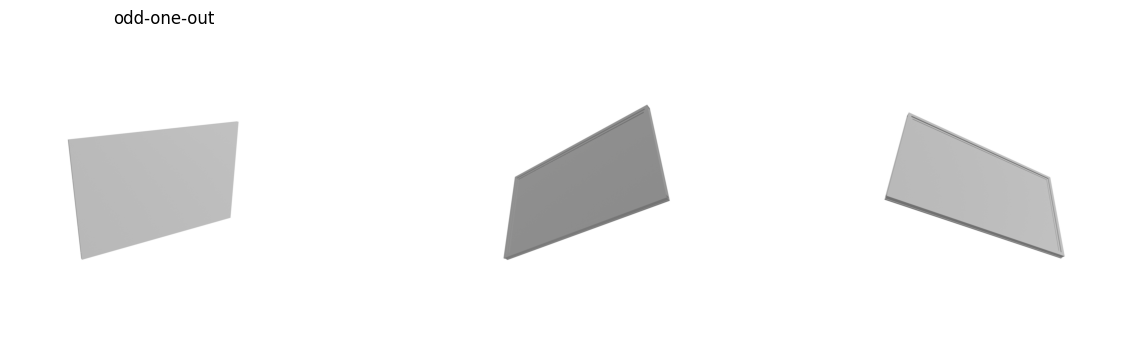

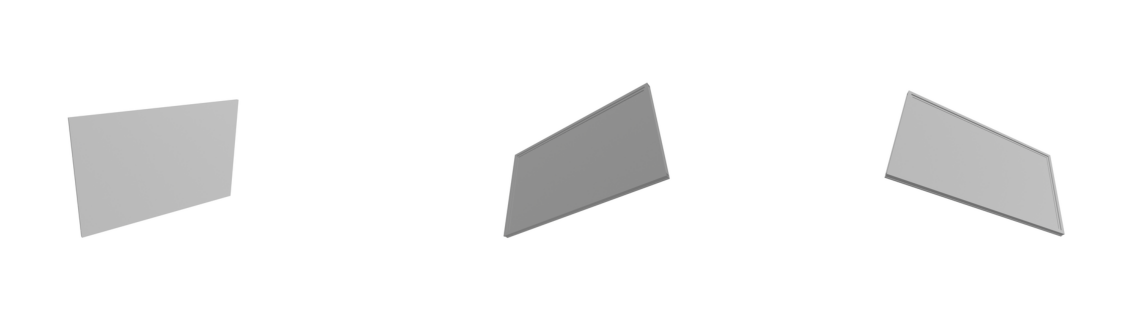

In [22]:
quantitative_benchmark = Benchmark(benchmark_dataset, preprocessed_imgs_benchmark)
print(quantitative_benchmark[300]["img_tensor"].shape)
print(quantitative_benchmark[300]["metadata"])
plot_trial(quantitative_benchmark[300]["metadata"])
plot_tensor(quantitative_benchmark[300]["img_tensor"])

In [16]:
preprocessed_imgs_qualitative_benchmark = mochi_to_batch_list(qualitative_benchmark_subset, device=device)

torch.Size([3, 3, 504, 504])
{'dataset': 'shapenet', 'condition': 'airplane', 'trial': 'shapenet1445', 'n_objects': 3, 'oddity_index': 2, 'images': [<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1000x1000 at 0x2AFF48978220>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1000x1000 at 0x2AFF489780A0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1000x1000 at 0x2AFF48978340>], 'n_subjects': 18, 'human_avg': 0.25, 'human_sem': 0.1212678125181665, 'human_std': 0.5144957554275266, 'RT_avg': 3812.3333333333335, 'RT_sem': 489.6155154212093, 'RT_std': 2077.2627067709022, 'DINOv2G_avg': 1.0, 'DINOv2G_std': 0.0, 'DINOv2G_sem': 0.0, 'trial_id': 1440}


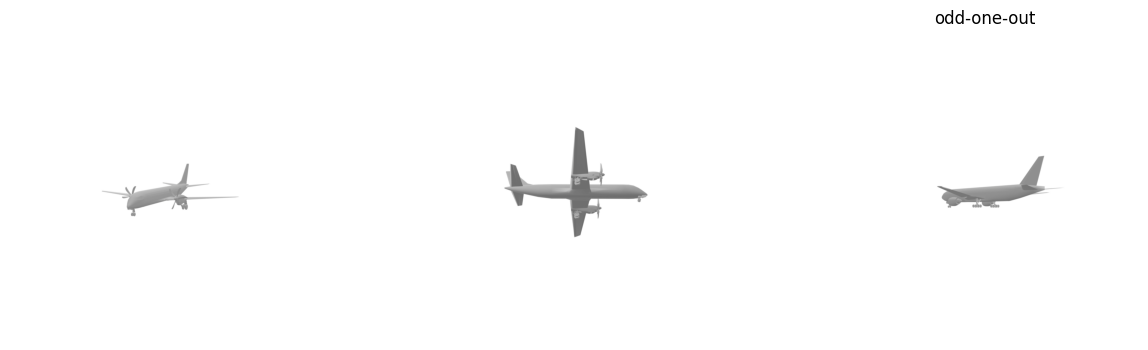

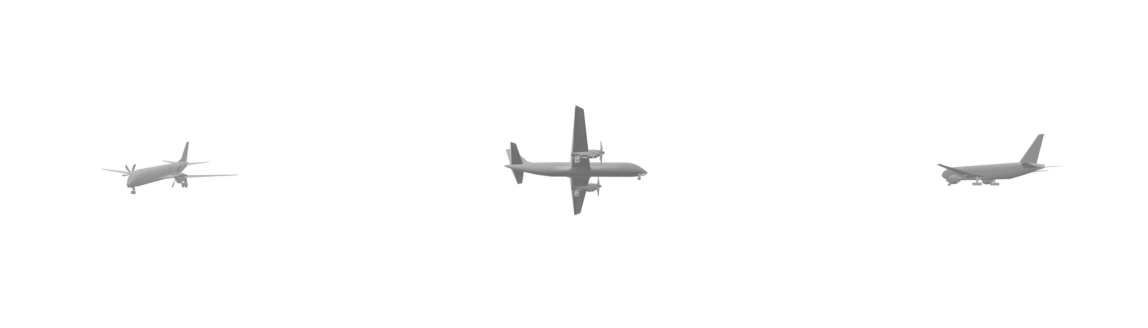

In [23]:
qualitative_benchmark = Benchmark(qualitative_benchmark_subset, preprocessed_imgs_qualitative_benchmark)
sample_idx = 9
print(qualitative_benchmark[sample_idx]["img_tensor"].shape)
print(qualitative_benchmark[sample_idx]["metadata"])
plot_trial(qualitative_benchmark[sample_idx]["metadata"])
plot_tensor(qualitative_benchmark[sample_idx]["img_tensor"])

In [24]:
class FeatureCapture:
    def __init__(self, model, targets, mode="input"):
        self.model = model
        self.targets = targets
        self.mode = mode
        self.feats = {}
        self.handles = []

    @staticmethod
    def _prehook(store, alias):
        # pre-hook: receives (mod, inp) - 2 arguments
        def fn(mod, inp):
            store[alias] = inp[0].detach()
        return fn

    @staticmethod
    def _fwdhook(store, alias):
        # forward-hook: receives (mod, inp, out) - 3 arguments  
        def fn(mod, inp, out):
            store[alias] = out.detach()
        return fn

    def start(self):
        self.stop()
        self.feats.clear()
        for alias, m in self.targets.items():
            if m is None:
                raise ValueError(f"Target module for {alias} is None")
            if self.mode == "input":
                # Use _prehook for input capture
                self.handles.append(m.register_forward_pre_hook(self._prehook(self.feats, alias)))
            else:
                # Use _fwdhook for output capture
                self.handles.append(m.register_forward_hook(self._fwdhook(self.feats, alias)))

    def stop(self):
        for h in self.handles:
            h.remove()
        self.handles = []


In [34]:
from typing import Iterator, Tuple, List, Dict, Generator

def pi3_inference_capture_iterator(
    model, 
    bench : Benchmark,
    dataloader: DataLoader,
    results_label: str
) -> None:
    """
    Process batches using iterator approach for memory efficiency
    
    Args:
        model: Pi³ model
        batch_iterator: Iterator yielding batch dictionaries
    
    Returns:
        results_list: List of model outputs for each batch
        caps_feat_list: List of captured features for each batch
    """
    # Capture features
    caps = FeatureCapture(model, {
        "hidden_features": model.point_decoder,
    }, mode="input")

    # Mixed precision setup
    dtype = torch.bfloat16 if torch.cuda.is_available() and torch.cuda.get_device_capability()[0] >= 8 else torch.float16

    print("Running model inference with iterator...")
    
    with torch.no_grad():
        with torch.amp.autocast('cuda', dtype=dtype):
            for idx, batch_data in enumerate(dataloader):
                """
                Let N be the number of images in the trial
                All yields refer to "batch_tensor"
                Leave one out should yield (N, N-1, C, H, W)
                All should yield (1, N, C, H, W)
                Individual should yield (N, 1, C, H, W) [unimplemented]
                """
                
                batch_tensor = batch_data["batch_tensor"]
                assert len(batch_tensor.shape) == 5, "Batch tensor must have 5 dimensions"
                caps.start()
                results = model(batch_tensor)
                caps.stop()
                
                # Store results with metadata
                bench.results[idx][results_label] = {
                    "model_outputs": results,
                    "batch_data": batch_data,
                    "hidden_features": caps.feats["hidden_features"].clone()
                }

    print("Reconstruction complete!")


# Embedding analysis

## Single image to VGGT embedding

In [20]:
single_image_list = [t[:, None] for t in imgs]
single_image_list[0].shape

torch.Size([4, 1, 3, 504, 504])

In [21]:
results, caps = pi3_inference_capture(model, img_tensor_list=single_image_list)

Running model inference...
Reconstruction complete!


In [22]:
caps[0].shape

torch.Size([4, 1301, 2048])

In [23]:
results[0]["camera_poses"].shape

torch.Size([4, 1, 4, 4])

In [24]:
results[0]["points"].shape

torch.Size([4, 1, 504, 504, 3])

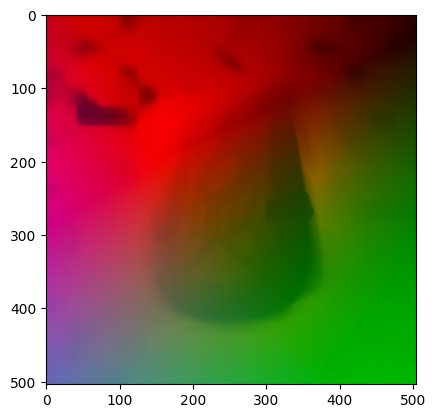

In [25]:
# image_mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 1, 3)
# image_std  = torch.tensor([0.229, 0.224, 0.225]).view(1, 1, 3)

# ex_map = results["points"][0][0].cpu() * image_std + image_mean
ex_map = results[0]["points"][0][0].cpu()
plt.imshow(ex_map.numpy().clip(0, 1))

In [ ]:
caps[0].shape

torch.Size([4, 1301, 2048])

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import gridspec
from scipy.spatial.distance import squareform, pdist
import numpy as np

def plot_distance_matrix_with_images(embeddings, image_tensors, oddity_index=None, trial_n=-1, metric='cosine', cmap="magma"):
    """
    Plot distance matrix with images displayed along the top (x-axis) and left (y-axis).
    
    Args:
        embeddings: (N, D) embeddings of dimension D
        image_tensors: list of images (H, W, 3)
        oddity_index: index of the oddity image to highlight (optional)
        trial_n: integer trial number
        metric: distance metric
    """
    pooled_features = embeddings.cpu().numpy()
    distance_matrix = squareform(pdist(pooled_features, metric=metric))
    
    n_imgs = len(image_tensors)
    fig = plt.figure(figsize=(2+n_imgs, 2+n_imgs))

    gs = gridspec.GridSpec(
        n_imgs+1, n_imgs+1, figure=fig,
        width_ratios=[4] + [4]*n_imgs,
        height_ratios=[4] + [4]*n_imgs
    )
    
    # main matrix
    ax_matrix = fig.add_subplot(gs[1:, 1:])
    cax = ax_matrix.matshow(distance_matrix, cmap=cmap, vmin=0, vmax=1.0 if metric == 'cosine' else None)
    fig.colorbar(cax, ax=ax_matrix, fraction=0.046, pad=0.04)

    ax_matrix.set_xticks(np.arange(n_imgs))
    ax_matrix.set_yticks(np.arange(n_imgs))
    ax_matrix.set_xticklabels([])
    ax_matrix.set_yticklabels([])

    # top row (x-axis images)
    for j in range(n_imgs):
        ax = fig.add_subplot(gs[0, j+1])
        ax.imshow(image_tensors[j])
        ax.axis("off")
        
        # Add red border if this is the oddity
        if oddity_index is not None and j == oddity_index:
            rect = patches.Rectangle((0, 0), 1, 1, linewidth=5, edgecolor='red', 
                                   facecolor='none', transform=ax.transAxes, clip_on=False)
            ax.add_patch(rect)

    # left column (y-axis images)
    for i in range(n_imgs):
        ax = fig.add_subplot(gs[i+1, 0])
        ax.imshow(image_tensors[i])
        ax.axis("off")
        
        # Add red border if this is the oddity
        if oddity_index is not None and i == oddity_index:
            rect = patches.Rectangle((0, 0), 1, 1, linewidth=5, edgecolor='red', 
                                   facecolor='none', transform=ax.transAxes, clip_on=False)
            ax.add_patch(rect)
    
    # Annotate distances inside the matrix
    for i in range(n_imgs):
        for j in range(n_imgs):
            color = "white" if distance_matrix[i, j] <= distance_matrix.max()/2 else "black"
            ax_matrix.text(j, i, f"{distance_matrix[i, j]:.2f}",
                           ha="center", va="center", color=color, fontsize=8)

    # Add global title with oddity info
    title = f"Trial {trial_n}, metric = {metric}"
    if oddity_index is not None:
        title += f" (Oddity: Image {oddity_index})"
    fig.suptitle(title, fontsize=14, fontweight="bold", y=1.02)

    plt.tight_layout()
    return fig, distance_matrix

In [28]:
import numpy as np

def oddity_from_matrix(distance_matrix):
    """
    Given a pairwise distance matrix, identify the oddity as the item
    with the highest average distance to all other items.
    
    Args:
        distance_matrix: numpy array of shape (N, N), symmetric with zeros on diagonal
        
    Returns:
        oddity_index: int, index of the odd one out
        mean_distances: array of mean distances for each item
    """
    n = distance_matrix.shape[0]
    
    # Ensure diagonal is zero (self-distances)
    distance_matrix = distance_matrix.copy()
    np.fill_diagonal(distance_matrix, 0)
    
    # Compute mean off-diagonal distance for each item
    mean_distances = distance_matrix.sum(axis=1) / (n - 1)
    
    # Oddity = item with HIGHEST average distance (lowest similarity)
    oddity_index = np.argmax(mean_distances)
    
    return oddity_index

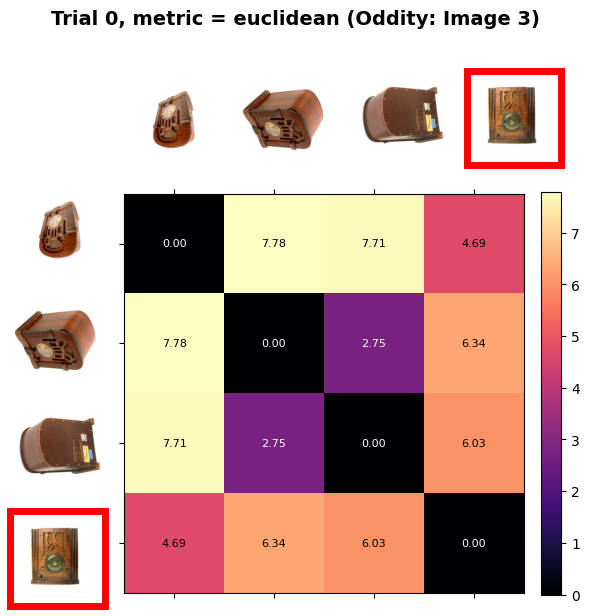

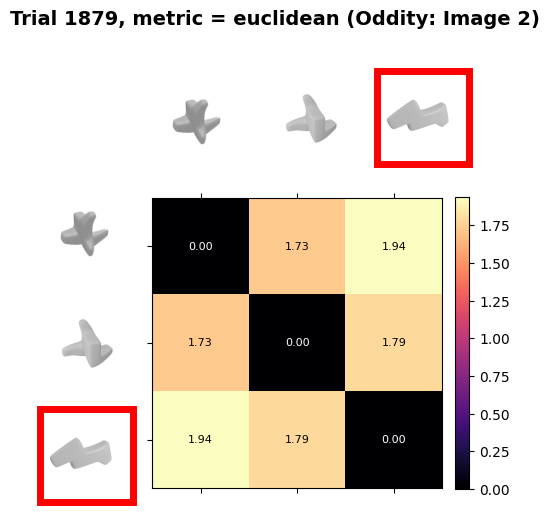

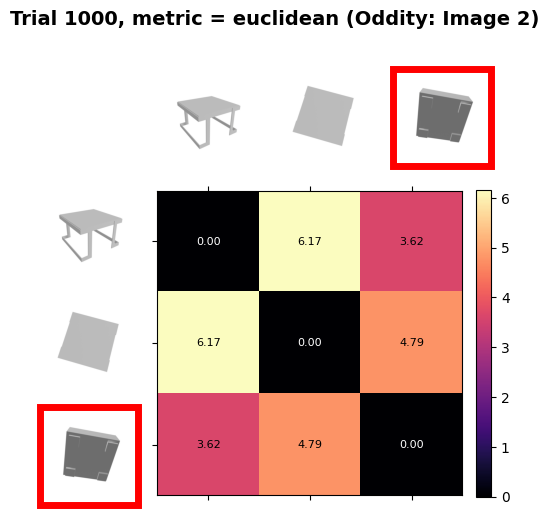

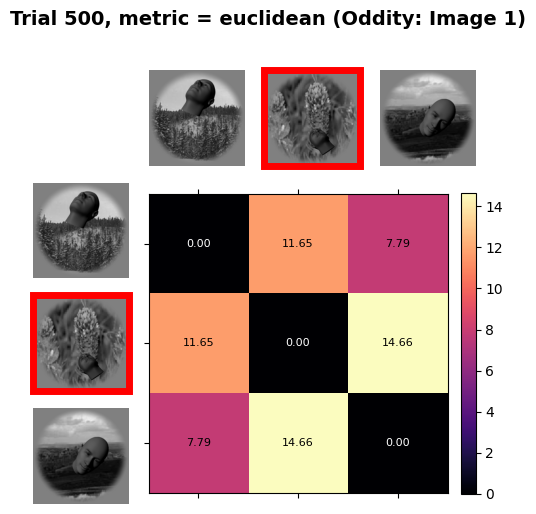

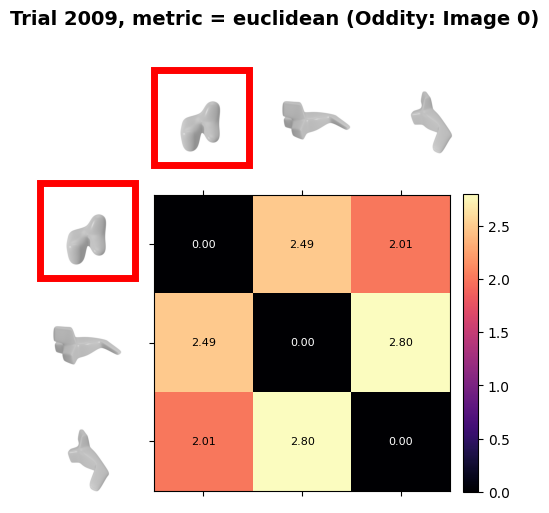

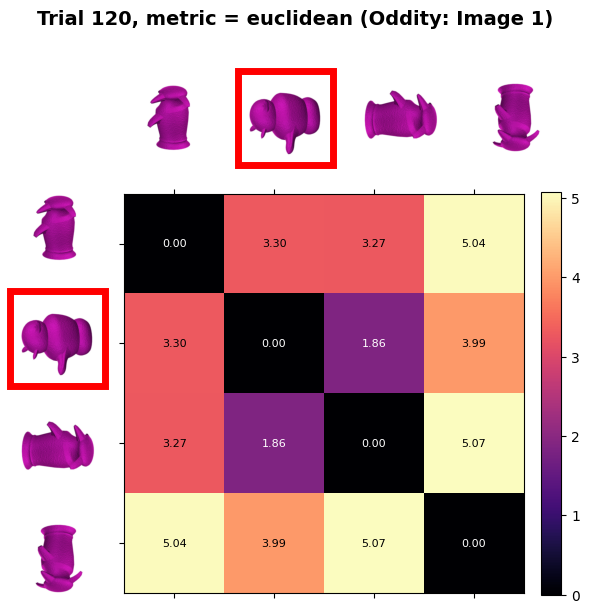

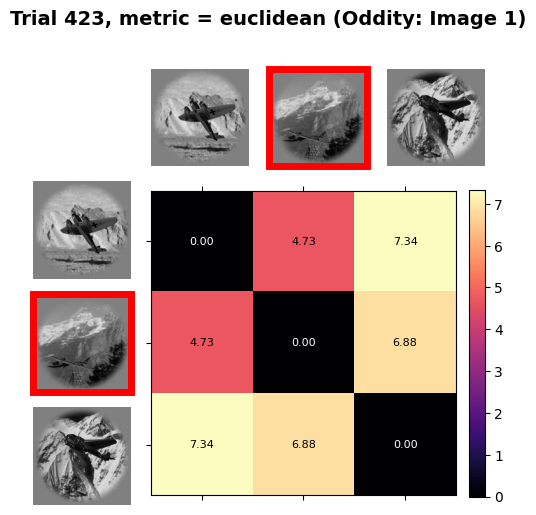

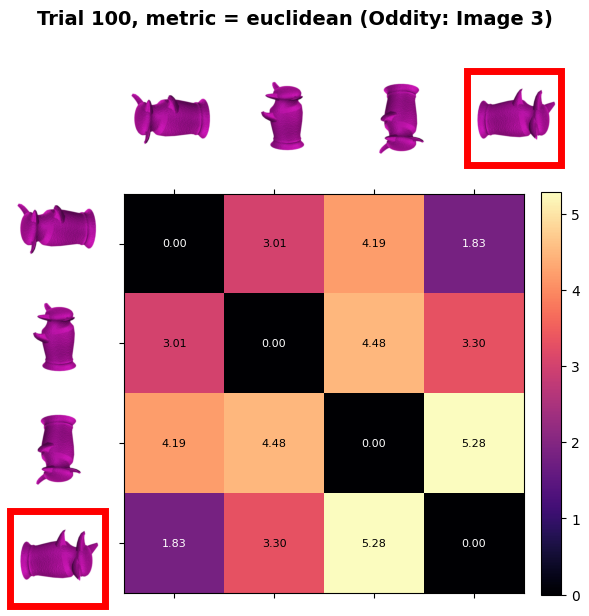

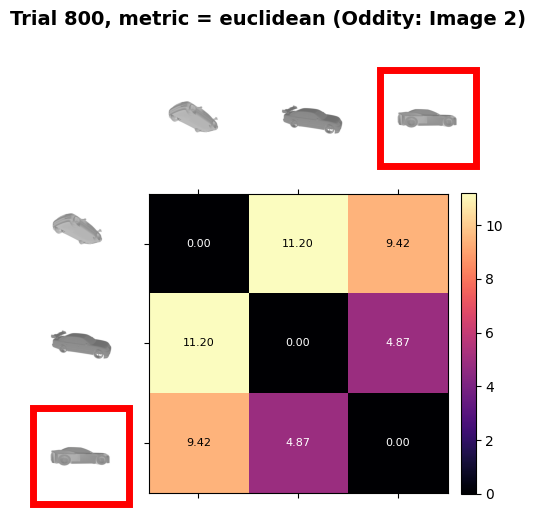

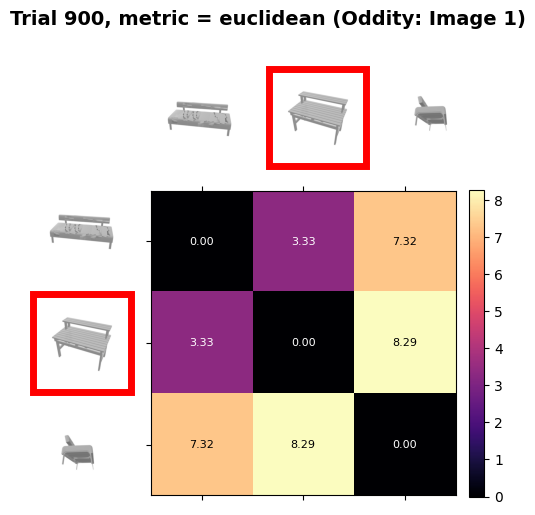

In [29]:
# drop the 5 tokens (image + camera tokens) → pool the rest
pred_oddities = []
for i in range(len(trial_subset_idx)):
    pi3_embeddings = caps[i][:, 5:, :].mean(dim=1)
    fig, distances = plot_distance_matrix_with_images(pi3_embeddings, trial_subset[i]["images"], metric="euclidean", trial_n=trial_subset_idx[i], oddity_index=trial_subset[i]["oddity_index"])
    pred_oddity = oddity_from_matrix(distances)
    pred_oddities.append(pred_oddity)

In [30]:
pred_oddities

[0, 2, 1, 1, 1, 3, 2, 2, 0, 2]

In [31]:
accuracy = [pred_oddities[i] == trial_subset[i]["oddity_index"] for i in range(len(pred_oddities))]
accuracy = sum(accuracy) / len(accuracy)
accuracy

0.2

## Left-out VGGT embeddings

In [33]:
import torch
from itertools import combinations
from torch.utils.data import DataLoader

def no_batch_collate(batch):
    """Returns the first item without adding batch dimension"""
    return batch[0]

qualitative_dataloader = DataLoader(qualitative_benchmark.as_leave_one_out_iterable(), batch_size=1, shuffle=False, collate_fn=no_batch_collate)
pi3_inference_capture_iterator(model, qualitative_benchmark, qualitative_dataloader, "leave_one_out")

Running model inference with iterator...
dict_keys(['batch_tensor', 'left_out_tensor', 'left_out_idx_order', 'trial_idx'])
dict_keys(['batch_tensor', 'left_out_tensor', 'left_out_idx_order', 'trial_idx'])
dict_keys(['batch_tensor', 'left_out_tensor', 'left_out_idx_order', 'trial_idx'])
dict_keys(['batch_tensor', 'left_out_tensor', 'left_out_idx_order', 'trial_idx'])
dict_keys(['batch_tensor', 'left_out_tensor', 'left_out_idx_order', 'trial_idx'])
dict_keys(['batch_tensor', 'left_out_tensor', 'left_out_idx_order', 'trial_idx'])
dict_keys(['batch_tensor', 'left_out_tensor', 'left_out_idx_order', 'trial_idx'])
dict_keys(['batch_tensor', 'left_out_tensor', 'left_out_idx_order', 'trial_idx'])
dict_keys(['batch_tensor', 'left_out_tensor', 'left_out_idx_order', 'trial_idx'])
dict_keys(['batch_tensor', 'left_out_tensor', 'left_out_idx_order', 'trial_idx'])
dict_keys(['batch_tensor', 'left_out_tensor', 'left_out_idx_order', 'trial_idx'])
dict_keys(['batch_tensor', 'left_out_tensor', 'left_out_i

In [45]:
%uv pip install print_schema
from print_schema import print_schema
print_schema(qualitative_benchmark[0], indent=2, dense=False)

Using Python 3.10.15 environment at: /usr/local
Resolved 6 packages in 504ms                                         
Prepared 1 package in 9ms                                                
Installed 1 package in 21ms                                 
 + print-schema==1.1.1
Note: you may need to restart the kernel to use updated packages.
|- metadata	 - <class 'dict'>
  |- dataset	 - <class 'str'>
  |- condition	 - <class 'str'>
  |- trial	 - <class 'str'>
  |- n_objects	 - <class 'int'>
  |- oddity_index	 - <class 'int'>
  |- images	 - list [3] <class 'PIL.PngImagePlugin.PngImageFile'>
  |- n_subjects	 - <class 'int'>
  |- human_avg	 - <class 'float'>
  |- human_sem	 - <class 'float'>
  |- human_std	 - <class 'float'>
  |- RT_avg	 - <class 'float'>
  |- RT_sem	 - <class 'float'>
  |- RT_std	 - <class 'float'>
  |- DINOv2G_avg	 - <class 'float'>
  |- DINOv2G_std	 - <class 'float'>
  |- DINOv2G_sem	 - <class 'float'>
  |- trial_id	 - <class 'int'>
Not supported
|- results	 - <class 'di

In [42]:
qualitative_benchmark[0]["results"]["leave_one_out"].keys()

dict_keys(['model_outputs', 'batch_data', 'hidden_features'])

In [43]:
qualitative_benchmark[0]["results"]["leave_one_out"]["batch_data"].keys()

dict_keys(['batch_tensor', 'left_out_tensor', 'left_out_idx_order', 'trial_idx'])

In [44]:
qualitative_benchmark[0]["results"]["leave_one_out"]["model_outputs"].keys()

dict_keys(['points', 'local_points', 'conf', 'camera_poses'])

In [53]:
qualitative_benchmark[3]["results"]["leave_one_out"]["model_outputs"]["conf"].shape

torch.Size([4, 3, 504, 504, 1])